# Email Spam Detection

Import Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix

Loading Dataset

In [3]:
spam = pd.read_csv("C:/Users/Sandipa/Downloads/spam.csv",encoding='ISO-8859-1')

In [4]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
spam.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
spam.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4960,ham,"A bit of Ur smile is my hppnss, a drop of Ur t...",NaN,NaN,NaN


Data Cleaning

In [7]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
spam.shape

(5572, 5)

In [9]:
spam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Droping Columns

In [10]:
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
spam.sample(5)

,v1,v2
2510,ham,Yunny i'm walking in citylink now Ì_ faster co...
1519,ham,Check wid corect speling i.e. Sarcasm
1191,ham,Come to my home for one last time i wont do an...
5204,ham,How come she can get it? Should b quite diff t...
1628,ham,Yes princess! I want to make you happy...


In [11]:
# renaming the columns
spam.rename(columns={'v1':'target','v2':'text'},inplace=True)
spam.sample(5)

,target,text
2382,ham,I will reach before ten morning
2259,ham,Ill call you evening ill some ideas.
1763,ham,Joy's father is John. Then John is the NAME of...
5470,ham,I thought slide is enough.
1685,ham,Cramps stopped. Going back to sleep


In [12]:
spam['target'] = spam.target.map({'ham': 0, 'spam': 1})
spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
spam.shape

(5572, 2)

In [14]:
## Checking Null Values
spam.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
## Checking duplicate values
spam.duplicated().sum()

403

In [16]:
## Remove duplicates
spam = spam.drop_duplicates(keep='first')

spam.duplicated().sum()

0

In [17]:
spam.shape

(5169, 2)

In [18]:
spam.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


EDA

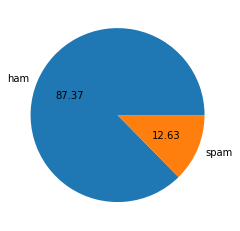

In [19]:
import matplotlib.pyplot as plt
plt.pie(spam['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
# Data is imbalanced
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sandipa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
spam['num_char'] = spam['text'].apply(len)
spam.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# num of words
spam['num_words'] = spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))
spam.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
spam['num_sentences'] = spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
spam.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
spam[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286903,1.961308
std,58.236293,13.227173,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [25]:
# Email ham
spam[spam['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.958370,1.815545
std,56.358207,13.395014,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [26]:
# Email spam
spam[spam['target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [27]:
spam.corr()

,target,num_char,num_words,num_sentences
target,1.000000,0.384717,0.264160,0.267602
num_char,0.384717,1.000000,0.965309,0.626118
num_words,0.264160,0.965309,1.000000,0.683584
num_sentences,0.267602,0.626118,0.683584,1.000000


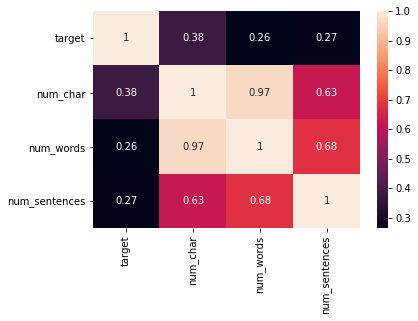

In [28]:
sns.heatmap(spam.corr(),annot=True)

Data Preprocessing

In [29]:
ps = PorterStemmer()

In [30]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sandipa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [33]:
spam['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [34]:
spam['transformed_text'] = spam['text'].apply(transform_text)
spam.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

Model Building

In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [39]:
X = tfidf.fit_transform(spam['transformed_text']).toarray()

In [40]:
X.shape

(5169, 3000)

In [41]:
y = spam['target'].values

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Naive Bayes

In [43]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
prediction = model.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test,prediction)
recall = recall_score(y_test, prediction)
f1  = f1_score(y_test,prediction)
confusion_mat = confusion_matrix(y_test, prediction)
print('Accuracy:', accuracy)
print('Precision score', precision)
print('Recall score', recall)
print('F1 score', f1)
print('Confusion matrix:', confusion_mat)

Accuracy: 0.965183752417795
Precision score 1.0
Recall score 0.7339901477832512
F1 score 0.8465909090909091
Confusion matrix: [[1348    0]
 [  54  149]]


In [46]:
# Calculate the error rate
error_rate = 1 - accuracy
print('Error rate:', error_rate)

Error rate: 0.03481624758220503


In [47]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1348
           1       1.00      0.73      0.85       203

    accuracy                           0.97      1551
   macro avg       0.98      0.87      0.91      1551
weighted avg       0.97      0.97      0.96      1551



Logistic Regression

In [48]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
prediction = model.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test,prediction)
recall = recall_score(y_test, prediction)
f1  = f1_score(y_test,prediction)
confusion_mat = confusion_matrix(y_test, prediction)
print('Accuracy:', accuracy)
print('Precision score', precision)
print('Recall score', recall)
print('F1 score', f1)
print('Confusion matrix:', confusion_mat)

Accuracy: 0.9451966473243069
Precision score 0.9758064516129032
Recall score 0.5960591133004927
F1 score 0.7400611620795108
Confusion matrix: [[1345    3]
 [  82  121]]


In [51]:
# Calculate the error rate
error_rate = 1 - accuracy
print('Error rate:', error_rate)

Error rate: 0.05480335267569314


In [52]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1348
           1       0.98      0.60      0.74       203

    accuracy                           0.95      1551
   macro avg       0.96      0.80      0.85      1551
weighted avg       0.95      0.95      0.94      1551

